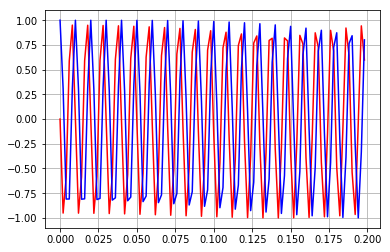

[1.00004514+0.j         1.00004535+0.0010574j  1.00004598+0.00211481j
 1.00004702+0.00317223j 1.00004848+0.00422967j 1.00005036+0.00528712j
 1.00005265+0.0063446j  1.00005537+0.00740212j 1.0000585 +0.00845966j
 1.00006204+0.00951725j]
[-0.32491968+0.j         -0.32492054+0.00045656j -0.3249231 +0.00091312j
 -0.32492737+0.00136969j -0.32493334+0.00182625j -0.32494103+0.00228282j
 -0.32495042+0.0027394j  -0.32496152+0.00319598j -0.32497432+0.00365257j
 -0.32498884+0.00410916j]


In [22]:
from scipy.fftpack import fft, ifft
import numpy as np
from scipy.signal import chirp


t = np.linspace(0, 10, 5001)
w = chirp(t, f0=100, f1=150, t1=10, method='linear')
w2 = chirp(t, f0=100, f1=150, t1=10, phi=90,method='linear')

plt.plot(t[:100],w2[:100],'r')
plt.plot(t[:100],w[:100],'b')
plt.grid()
plt.show()

y = fft(w2)
z= fft(w)

# 
print(z[:10])

print(y[:10])

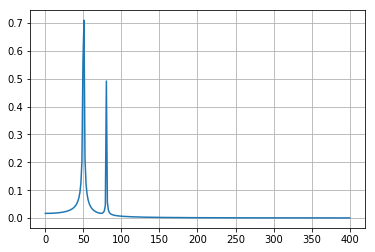

In [7]:
from scipy.fftpack import fft
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

The I and Q components are related as

I = A cos(Φ)

Q = A sin(Φ)	

From this, the signal magnitude A and phasen angle Φ can be calculated as

$A^2= I^2+Q^2$

Φ=arctan(Q/I)	

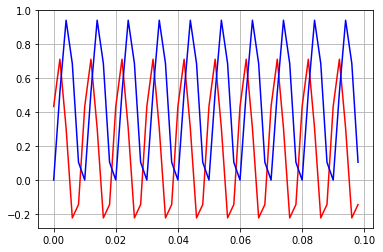


 Initial Phase was:1/7 *pi


In [130]:
from scipy.fftpack import fft, ifft
import numpy as np
from scipy.signal import chirp


t = np.linspace(0, 10, 5001)
# w = chirp(t, f0=100, f1=150, t1=10, method='linear')
# w2 = chirp(t, f0=100, f1=150, t1=10, phi=90,method='linear')
n= 7 # 1/n *pi  initial phase


s_sine= np.sin(50.0 * 2.0*np.pi*t)          #sin
s_cosine=np.sin(50.0 * 2.0*np.pi*t+np.pi/2)   #cosin  pi*n nust positive


# r = np.sin(50.0 * 2.0*np.pi*t)
r2 = np.sin(50.0 * 2.0*np.pi*t+np.pi/n)  #receive signal


qua_phase = r2*s_sine    # receive signal multiply sin signal  Quadrature phase
in_phase=  r2*s_cosine    # receive signal multiply cosin signal in phase

plt.plot(t[:50],in_phase[:50],'r')
plt.plot(t[:50],qua_phase[:50],'b')
plt.grid()
plt.show()

fft_signal=fft(r2)
fft_in_phase = fft(in_phase)  #in phase
fft_qua_phase= fft(qua_phase)  #quadrature phase

# 
# print('receive  signal :\n',fft_signal[:2],'\n')

# print('In phase :\n',fft_in_phase[:2],'\n')

# print('Quadrature phase :\n',fft_qua_phase[:2])

initial_phase=np.real(np.arctan(fft_qua_phase[0]/fft_in_phase[0])/np.pi)
initial_phase =1/(0.5-initial_phase)

print('\n Initial Phase was:1/%.f'%initial_phase, '*pi')

In [82]:
print(np.arctan(1.768/1.768)/np.pi, '*pi')

0.25 *pi


Φ=arctan(Q/I)

In [76]:
print('Phase was:',np.real(np.arctan(fft_qua_phase[0]/fft_in_phase[0])/np.pi), '*pi')

Phase was: 0.24993635075345158 *pi


In [85]:
print('Phase was:%.3f'%np.real(np.arctan(fft_qua_phase[0]/fft_in_phase[0])/np.pi), '*pi')

Phase was:0.167 *pi


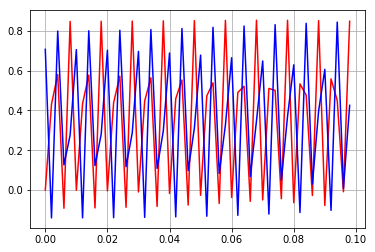


 Initial Phase was:1/4.0 *pi


In [128]:
#there is one problem that is phase must be positive

from scipy.fftpack import fft, ifft
import numpy as np
from scipy.signal import chirp


t = np.linspace(0, 10, 5001)
# w = chirp(t, f0=100, f1=150, t1=10, method='linear')
# w2 = chirp(t, f0=100, f1=150, t1=10, phi=90,method='linear')
n= 4 # 1/n *pi  initial phase


# s_sine= np.sin(50.0 * 2.0*np.pi*t)          #sin
# s_cosine=np.sin(50.0 * 2.0*np.pi*t+np.pi/2)   #cosin 
s_sine = chirp(t, f0=100, f1=150, t1=10, method='linear')
s_cosine=chirp(t, f0=100, f1=150, t1=10, phi=90,method='linear')
# r = np.sin(50.0 * 2.0*np.pi*t)
# r2 = np.sin(50.0 * 2.0*np.pi*t+np.pi/n)  #receive signal
r2 = chirp(t, f0=100, f1=150, t1=10, phi=180/n,method='linear')

qua_phase = r2*s_sine    # receive signal multiply sin signal  Quadrature phase
in_phase=  r2*s_cosine    # receive signal multiply cosin signal in phase

plt.plot(t[:50],in_phase[:50],'r')
plt.plot(t[:50],qua_phase[:50],'b')
plt.grid()
plt.show()

fft_signal=fft(r2)
fft_in_phase = fft(in_phase)  #in phase
fft_qua_phase= fft(qua_phase)  #quadrature phase

# 
# print('receive  signal :\n',fft_signal[:2],'\n')

# print('In phase :\n',fft_in_phase[:2],'\n')

# print('Quadrature phase :\n',fft_qua_phase[:2])

initial_phase=np.real(np.arctan(fft_qua_phase[0]/fft_in_phase[0])/np.pi)
initial_phase =1/(0.5-initial_phase)

print('\n Initial Phase was:1/%.1f'%initial_phase, '*pi')

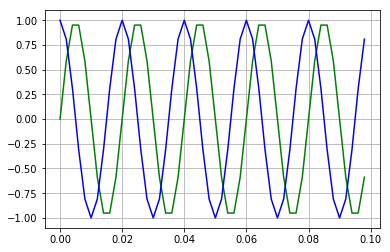

initial_phase is:-0.200*pi


In [186]:
from scipy.fftpack import fft, ifft
import numpy as np
from scipy.signal import chirp


t = np.linspace(0, 10, 5001)
# w = chirp(t, f0=100, f1=150, t1=10, method='linear')
# w2 = chirp(t, f0=100, f1=150, t1=10, phi=90,method='linear')
n= -5# 1/n *pi  initial phase


s_sine= np.sin(50.0 * 2.0*np.pi*t)          #sin
s_cosine=np.sin(50.0 * 2.0*np.pi*t+np.pi/2)   #cosin  pi*n nust positive
plt.plot(t[:50],s_sine[:50],'g')
plt.plot(t[:50],s_cosine[:50],'b')

# r = np.sin(50.0 * 2.0*np.pi*t)
r2 = np.sin(50.0 * 2.0*np.pi*t+np.pi/n)  #receive signal


qua_phase = r2*s_sine    # receive signal multiply sin signal  Quadrature phase
in_phase=  r2*s_cosine    # receive signal multiply cosin signal in phase

# plt.plot(t[:50],in_phase[:50],'r')
# plt.plot(t[:50],qua_phase[:50],'b')
plt.grid()
plt.show()

fft_signal=fft(r2)
fft_in_phase = fft(in_phase)  #in phase
fft_qua_phase= fft(qua_phase)  #quadrature phase


# print('The phase is:',get_phase,1/get_phase)
initial_phase=np.real(np.arctan(fft_qua_phase[0]/fft_in_phase[0])/np.pi)
if initial_phase >0 :
    initial_phase =0.5-initial_phase
    print('initial_phase is:%.3f*pi'%initial_phase)
else:
    initial_phase =-0.5-initial_phase
    print('initial_phase is:%.3f*pi'%initial_phase)
        
# initial_phase =1/(0.5-initial_phase)
# # initial_phase =1/(-0.5-initial_phase)

# print('\n Initial Phase was:1/%.f'%initial_phase, '*pi')